<a href="https://colab.research.google.com/github/Rodrigoradzinski/TrabalhosColab/blob/main/Yahoofinance_Aula8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title

nome_integrante_1 = "Cleyton Rodrigo Radzinsk- 9° Periodo" # @param {type:"string"}
nome_integrante_2 = "Douglas Mariano Santa Rosa - 5° Periodo" # @param {type:"string"}

In [ ]:
import matplotlib
import numpy as np
import random
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import plot
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()

In [ ]:
config_linhas = {
    "saldo": {"cor": "green", "estilo": "--"},
    "^BVSP": {"cor": "blue", "estilo": ":"},
}

In [ ]:
def plotar_grafico(tabela, nome_coluna, titulo_grafico, config_linhas={}):
    plt.figure(figsize=(18,8))
    for coluna in tabela.columns:
        if coluna == nome_coluna:
            if coluna in config_linhas:
                plt.plot(tabela[coluna], linestyle=config_linhas[coluna]['estilo'], color=config_linhas[coluna]['cor'], label=coluna)
            else:
                plt.plot(tabela[coluna], linestyle='-', label=coluna)
        else:
            plt.plot(tabela[coluna], label=coluna)
    plt.title(titulo_grafico)
    plt.legend()
    plt.show()

# 1) Selecione 5 ativos (pode ser ações, criptmoedas, etc) e gere um gráfico normalizado deles.

[*********************100%%**********************]  5 of 5 completed


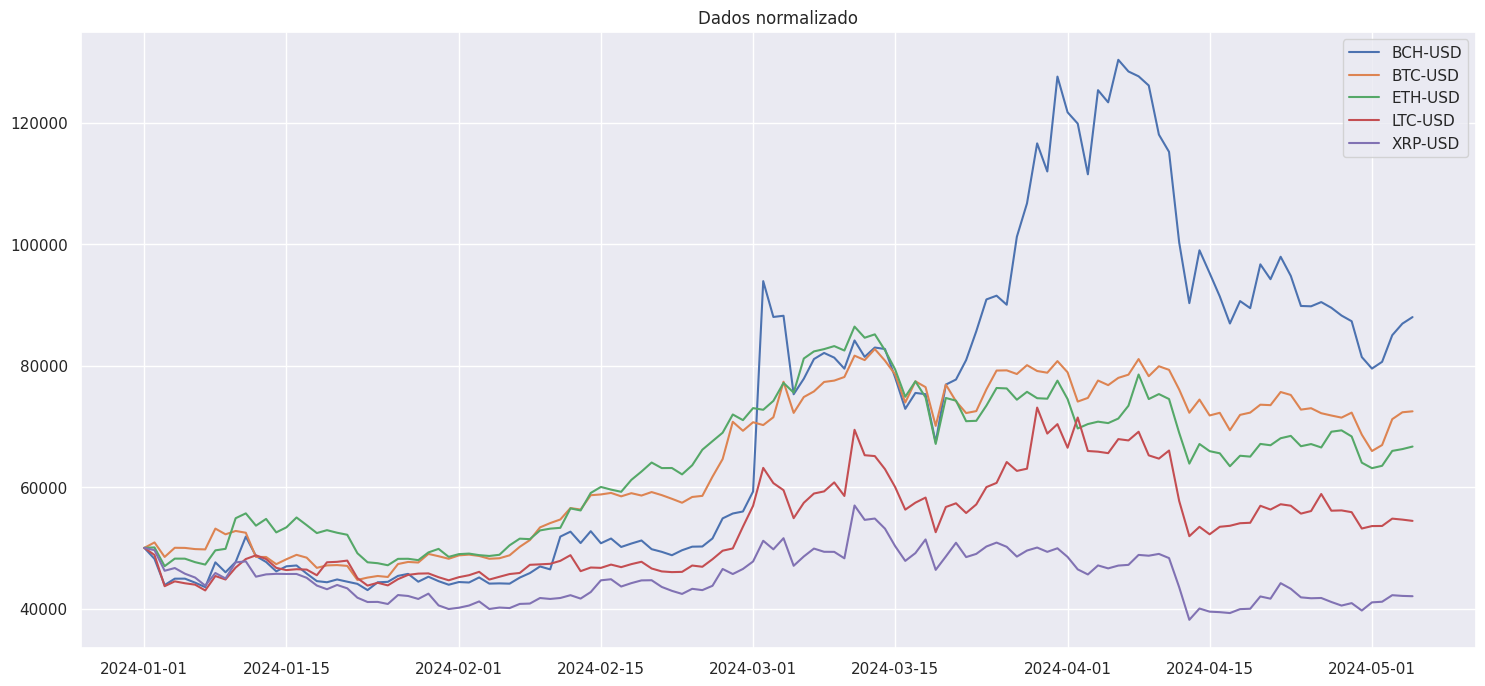

In [ ]:
sns.set()
ativos = ["BTC-USD", "ETH-USD", "XRP-USD", "LTC-USD", "BCH-USD"]
data_inicial = "2024-01-01"
data_final = "2024-05-06"

tabela_cotacoes = web.get_data_yahoo(ativos, data_inicial, data_final)["Adj Close"]
tabela_cotacoes.dropna(inplace=True)
carteira_normalizada = (tabela_cotacoes / tabela_cotacoes.iloc[0]) * 50000
plotar_grafico(carteira_normalizada, 'saldo', 'Dados normalizado', config_linhas)

# 2) Selecione até 10 ativos (pode ser ações, criptmoedas, etc) e faça sua comparação com o Ibovespa, dentro do período que você escolheu, quem ganhou mais? Sua carteira ou o Ibovespa?

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed


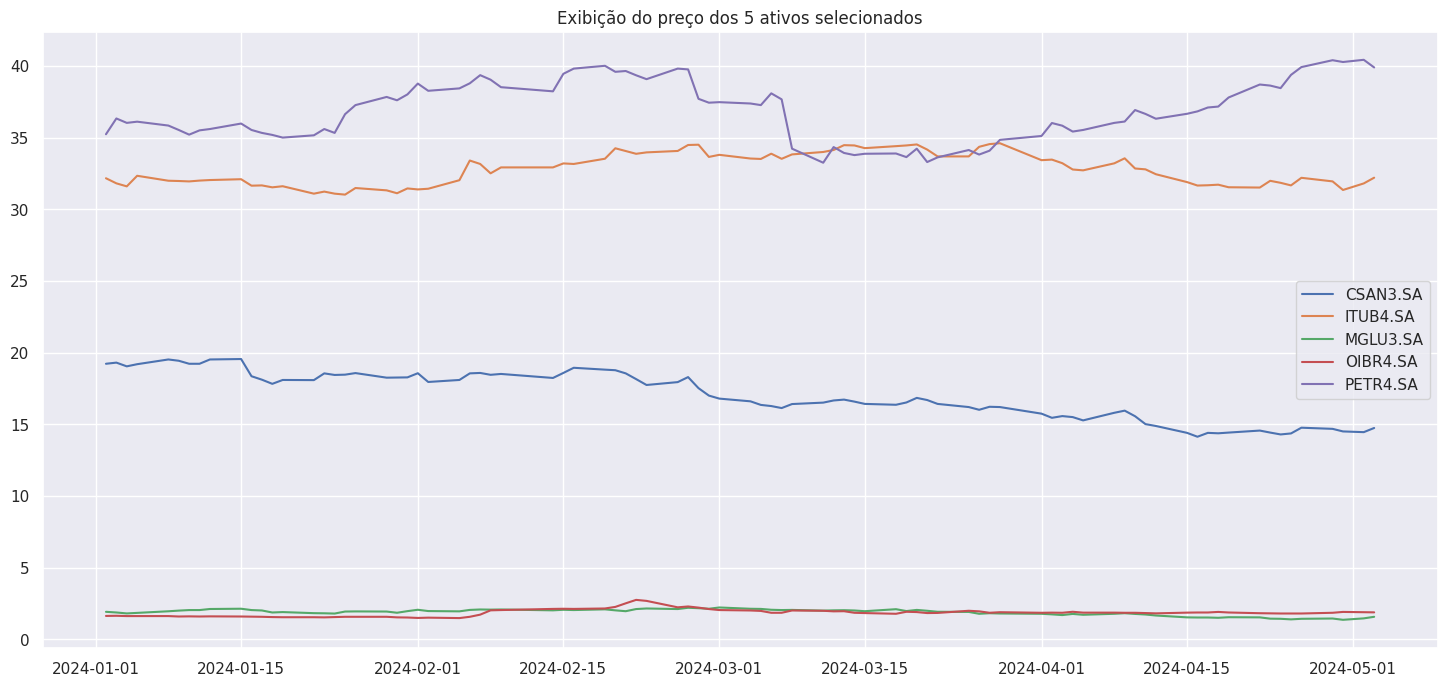

[*********************100%%**********************]  1 of 1 completed


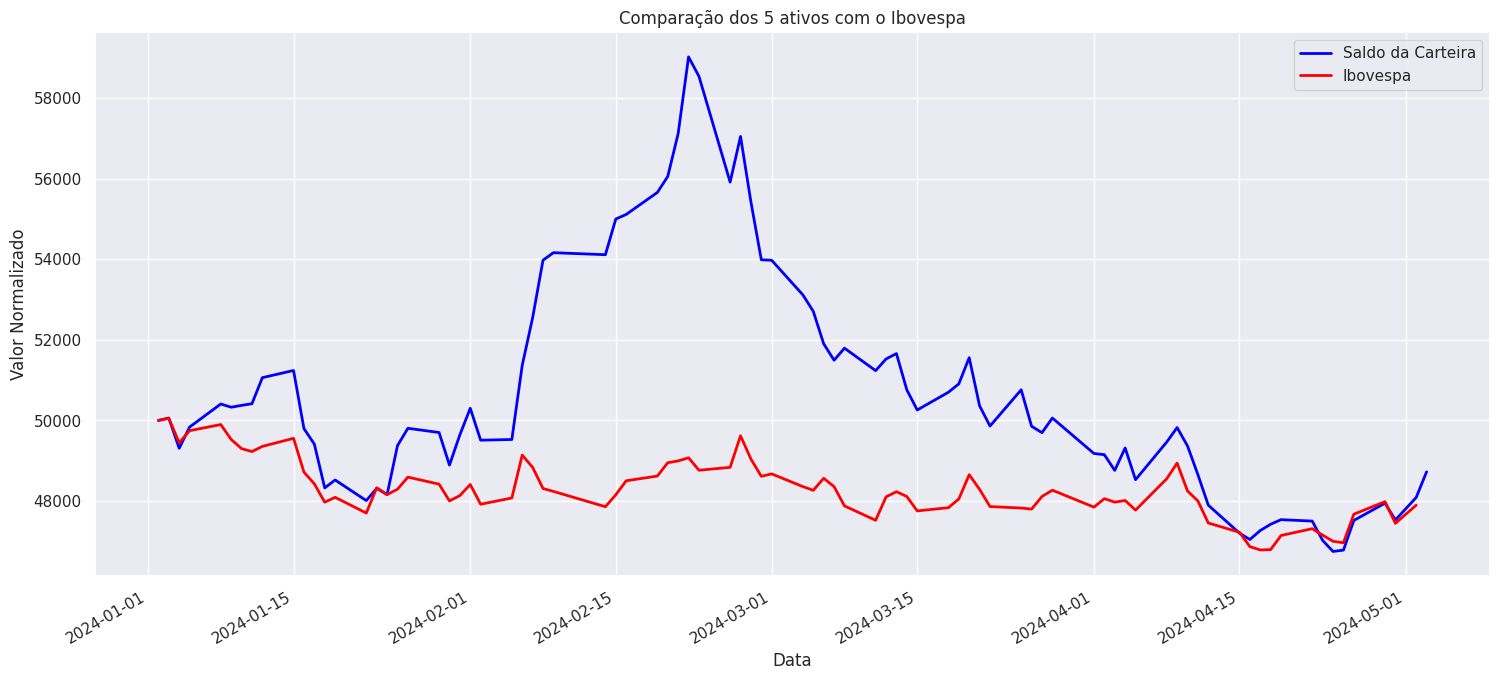

Rendimento final da carteira: 48725.83
Rendimento final do Ibovespa: 47899.35
A carteira superou o Ibovespa.


In [ ]:
ativos = ["PETR4.SA", "OIBR4.SA", "MGLU3.SA", "CSAN3.SA", "ITUB4.SA"]
data_inicial = "2024-01-01"
data_final = "2024-05-06"

tabela_cotacoes = web.get_data_yahoo(ativos, data_inicial, data_final)["Adj Close"]
tabela_cotacoes = yf.download(ativos, start=data_inicial, end=data_final)['Adj Close']
tabela_cotacoes.dropna(inplace=True)

carteira_normalizada = (tabela_cotacoes / tabela_cotacoes.iloc[0]) * 10000

plotar_grafico(tabela_cotacoes, 'saldo', 'Exibição do preço dos 5 ativos selecionados',config_linhas)
ibov = yf.download("^BVSP", start=data_inicial, end=data_final)['Adj Close']
ibov_normalizado = (ibov / ibov.iloc[0]) * 50000


media = False
label_grafico =''

if media:
    carteira_normalizada['Saldo da Carteira'] = carteira_normalizada.mean(axis=1);
    label_grafico = 'Saldo Médio da Carteira';
else:
     carteira_normalizada['Saldo da Carteira'] = carteira_normalizada.sum(axis=1)
     label_grafico = 'Saldo da Carteira'


plt.figure(figsize=(18,8))
carteira_normalizada['Saldo da Carteira'].plot(label=label_grafico, color='blue', linewidth=2)
ibov_normalizado.plot(label='Ibovespa', color='red', linewidth=2)
plt.title("Comparação dos 5 ativos com o Ibovespa")
plt.xlabel("Data")
plt.ylabel("Valor Normalizado")
plt.legend()
plt.show()


rendimento_carteira = carteira_normalizada['Saldo da Carteira'].iloc[-1]
rendimento_ibov = ibov_normalizado.iloc[-1]
print(f"Rendimento final da carteira: {rendimento_carteira:.2f}")
print(f"Rendimento final do Ibovespa: {rendimento_ibov:.2f}")
if rendimento_carteira > rendimento_ibov:
    print("A carteira superou o Ibovespa.")
else:
    print("O Ibovespa superou a carteira.")


3) Crie uma carteira de criptomoedas (a quantidade que você quiser) e faça a comparação com o Ibovespa considerando o mesmo período.

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


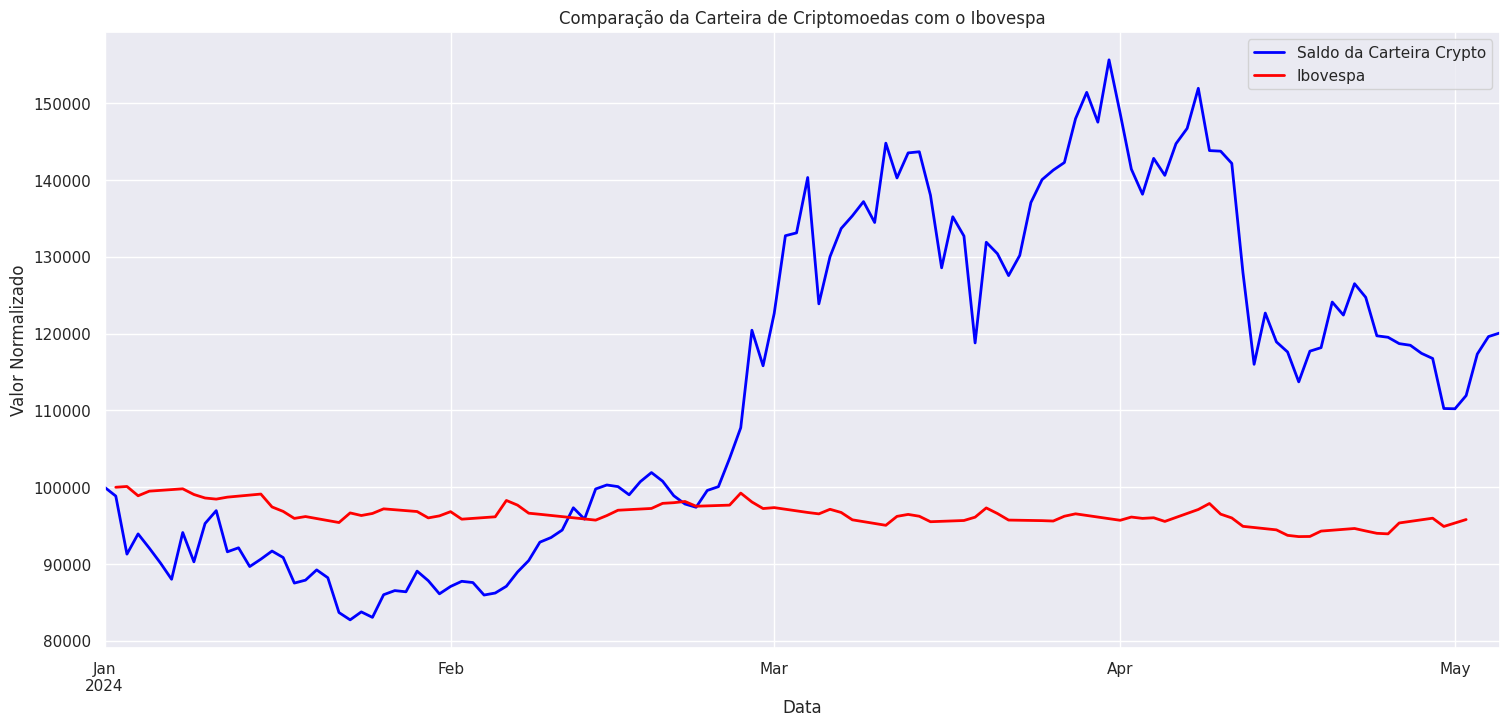

Rendimento final da carteira de criptomoedas: 120081.70
Rendimento final do Ibovespa: 95798.70
A carteira de criptomoedas superou o Ibovespa.


In [ ]:
ativos_crypto = ["BTC-USD", "ETH-USD", "XRP-USD", "LTC-USD", "BCH-USD", "ADA-USD", "DOT-USD", "SOL-USD", "DOGE-USD", "UNI-USD"]
data_inicial = "2024-01-01" #usando mesmo periodo
data_final = "2024-05-06"   #usando mesmo periodo

dados_crypto = yf.download(ativos_crypto, data_inicial, data_final)['Adj Close']
dados_crypto.dropna(inplace=True)

retorno_crypto = dados_crypto.pct_change()
retorno_acumulado_crypto = (1 + retorno_crypto).cumprod()
retorno_acumulado_crypto.iloc[0] = 1

carteira_crypto = 10000 * retorno_acumulado_crypto
carteira_crypto['Saldo da Carteira'] = carteira_crypto.sum(axis=1)


ibov = yf.download("^BVSP", data_inicial, data_final)['Adj Close']
ibov_normalizado = (ibov / ibov.iloc[0]) * 100000

plt.figure(figsize=(18, 8))
carteira_crypto['Saldo da Carteira'].plot(label='Saldo da Carteira Crypto', color='blue', linewidth=2)
ibov_normalizado.plot(label='Ibovespa', color='red', linewidth=2)
plt.title('Comparação da Carteira de Criptomoedas com o Ibovespa')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.show()

rendimento_carteira_crypto = carteira_crypto['Saldo da Carteira'].iloc[-1]
rendimento_ibov = ibov_normalizado.iloc[-1]
print(f"Rendimento final da carteira de criptomoedas: {rendimento_carteira_crypto:.2f}")
print(f"Rendimento final do Ibovespa: {rendimento_ibov:.2f}")

if rendimento_carteira_crypto > rendimento_ibov:
    print("A carteira de criptomoedas superou o Ibovespa.")
else:
    print("O Ibovespa superou a carteira de criptomoedas.")


4) Faça a análise 3 considerando o índice americano SP500 (500 maiores empresas dos EUA).
Utilize o código ^GSPC. Comparando com o Ibovespa no mesmo período, qual teve melhor e pior rendimento?

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


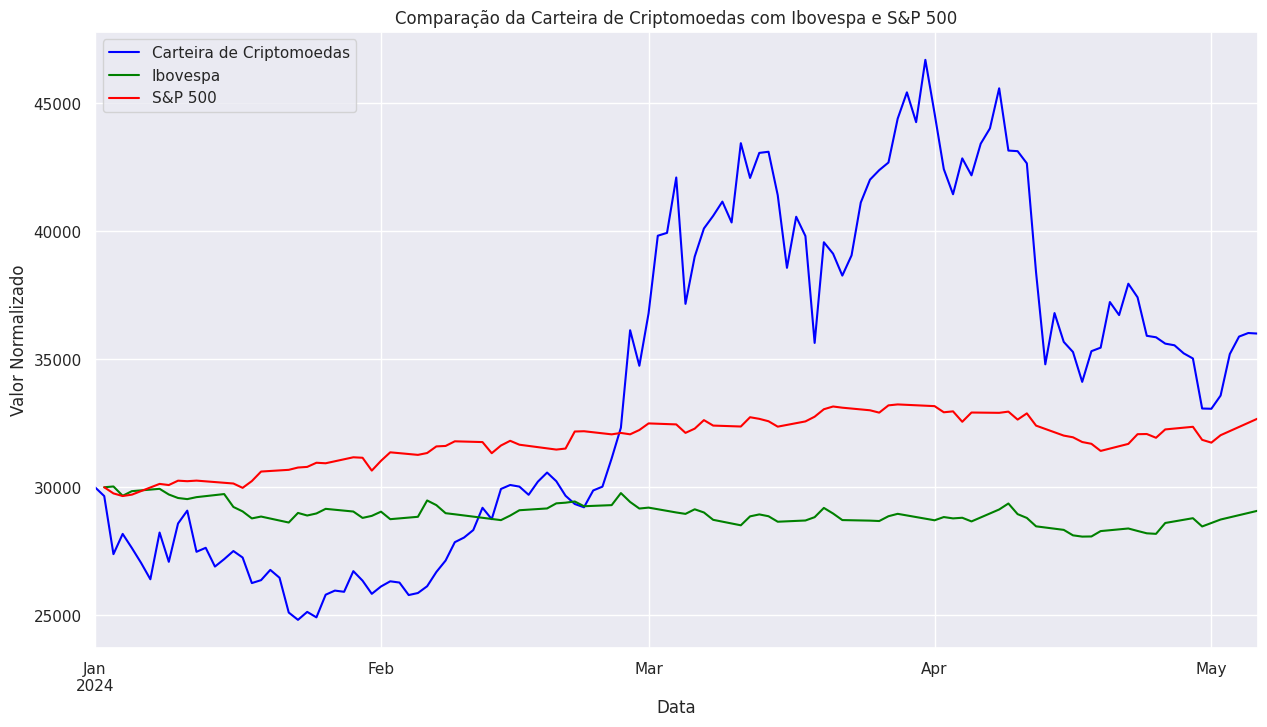

Rendimento final da Carteira de Criptomoedas: 36003.30
Rendimento final do Ibovespa: 29080.79
Rendimento final do S&P 500: 32678.65
A carteira de criptomoedas superou tanto o Ibovespa quanto o S&P 500.


In [ ]:
ativos_crypto
data_inicial = "2024-01-01" #usando mesmo periodo
data_final = "2024-06-30"    #usando mesmo periodo

dados_crypto = yf.download(ativos_crypto, data_inicial, data_final)['Adj Close']
dados_crypto.dropna(inplace=True)


normalizados_crypto = (dados_crypto / dados_crypto.iloc[0]) * 30000

ibov = yf.download('^BVSP', data_inicial, data_final)['Adj Close']
ibov_normalizado = (ibov / ibov.iloc[0]) * 30000

sp500 = yf.download('^GSPC', start=data_inicial, end=data_final)['Adj Close']
sp500_normalizado = (sp500 / sp500.iloc[0]) * 30000

plt.figure(figsize=(15, 8))
normalizados_crypto.mean(axis=1).plot(label='Carteira de Criptomoedas', color='blue')
ibov_normalizado.plot(label='Ibovespa', color='green')
sp500_normalizado.plot(label='S&P 500', color='red')
plt.title('Comparação da Carteira de Criptomoedas com Ibovespa e S&P 500')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.show()

rendimento_crypto = normalizados_crypto.mean(axis=1).iloc[-1]
rendimento_ibov = ibov_normalizado.iloc[-1]
rendimento_sp500 = sp500_normalizado.iloc[-1]

print(f"Rendimento final da Carteira de Criptomoedas: {rendimento_crypto:.2f}")
print(f"Rendimento final do Ibovespa: {rendimento_ibov:.2f}")
print(f"Rendimento final do S&P 500: {rendimento_sp500:.2f}")

if (rendimento_crypto > rendimento_ibov) and (rendimento_crypto > rendimento_sp500):
    print("A carteira de criptomoedas superou tanto o Ibovespa quanto o S&P 500.")
elif (rendimento_ibov > rendimento_sp500):
    print("O Ibovespa teve melhor rendimento que o S&P 500.")
else:
    print("O S&P 500 teve melhor rendimento que o Ibovespa.")

